In [49]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [39]:
with open('kmeans_model.pkl', 'rb') as file:
    scaler, model, scaled_data = pickle.load(file)


In [41]:
new_data = np.array([[5000, 20000]])  # [Units Sold, Profit]

In [43]:
# Scale the new data
new_scaled = scaler.transform(new_data)

# Predict cluster
cluster = model.predict(new_scaled)
print("Predicted Cluster:", cluster[0])


Predicted Cluster: 2


E:\Anaconda Installer\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
# Get the centroids in scaled space
centroids_scaled = model.cluster_centers_

# Convert the centroids back to original values
centroids_original = scaler.inverse_transform(centroids_scaled)


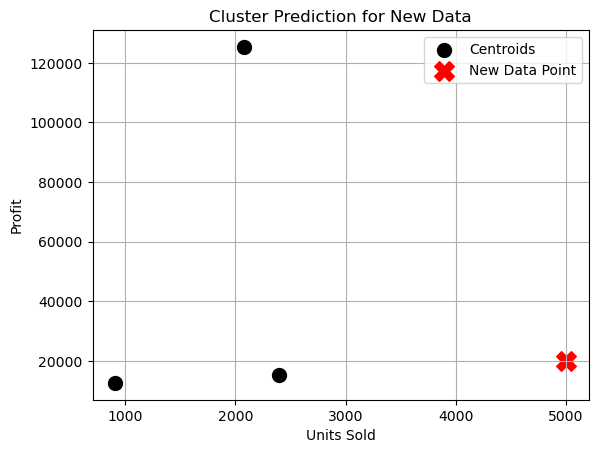

In [47]:
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='black', s=100, label='Centroids')


plt.scatter(new_data[0, 0], new_data[0, 1], c='red', marker='X', s=200, label='New Data Point')
plt.xlabel('Units Sold')
plt.ylabel('Profit')
plt.title('Cluster Prediction for New Data')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# Get predicted labels from the model
labels = model.labels_

# Calculate silhouette score
score = silhouette_score(scaled_data, labels)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.517


In this project, I tested a previously trained K-Means clustering model by feeding it a new data point with values [5000 units sold, $20,000 profit]. The model accurately scaled this input using the original StandardScaler, predicted its cluster membership, and placed it near an existing cluster centroid. We then visualized the cluster assignment on a 2D plot for better interpretability. To validate the model’s clustering effectiveness, we computed the Silhouette Score, which came out as 0.517, indicating reasonably well-separated clusters. This confirms the model is suitable for discovering customer/product segments based on sales and profit behaviors.